# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Tamem Ahmed

ID: 52-10996

Tutorial: T02

---

Name: Omar Hegazy

ID: 52-9494

Tutorial: T02

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/car_prices.csv')

df

<ipython-input-3-aa874dc2c83d>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0mi,—,gray,wheels exchange llc,$15650,$17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0mi,black,black,nissan infiniti lt,$19350,$21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0mi,white,beige,motorcars of south texas,$22200,$22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0mi,black,beige,avis rac/san leandro,$13400,$13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 5.7+ MB


In [35]:
df.describe(include='all')

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
count,46578.000000,46578,46578,46578,46578,46578,46578,46578,46578.000000,46578,46578,46578,46578,46578,46578,46578
unique,NaN,48,648,1097,71,2,46578,34,NaN,39460,20,17,4686,1021,953,2286
top,NaN,Ford,Altima,Base,Sedan,automatic,5npeb4acxdh702805,fl,NaN,1.0mi,black,black,"ford motor credit company,llc",$11300,$12000,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,NaN,7871,1610,4851,17171,44928,1,7451,NaN,86,9156,20734,1733,168,397,490
mean,2010.203401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.424265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.831316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.944009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [37]:
df['make'].value_counts()

Ford             7871
Chevrolet        5322
Nissan           4297
Toyota           3474
Dodge            2718
Honda            2403
Hyundai          1801
BMW              1680
Kia              1639
Chrysler         1566
Infiniti         1442
Mercedes-Benz    1375
Jeep             1305
Volkswagen       1038
Lexus            1024
GMC               901
Mazda             701
Cadillac          606
Audi              485
Acura             476
Buick             467
Lincoln           457
Subaru            444
Ram               397
Pontiac           377
Mitsubishi        370
MINI              289
Saturn            286
Volvo             281
Scion             159
Mercury           148
Land Rover        143
Porsche           129
Jaguar            122
Suzuki             96
HUMMER             84
FIAT               56
Saab               41
smart              36
Oldsmobile         24
Isuzu              19
Maserati           10
Bentley             8
Fisker              3
Plymouth            3
Geo       

In [38]:
df['model'].value_counts()

Altima                    1610
F-150                     1179
Fusion                    1115
Camry                     1081
Escape                    1063
                          ... 
TTS                          1
Safari                       1
Sierra 1500 Hybrid           1
Sierra 1500HD                1
Silverado 3500 Classic       1
Name: model, Length: 648, dtype: int64

In [39]:
df.body.unique()

array(['sedan', 'SUV', 'Sedan', 'E-Series Van', 'Crew Cab', 'suv',
       'G Sedan', 'Wagon', 'Regular Cab', 'Double Cab', 'wagon', 'Coupe',
       'Minivan', 'SuperCrew', 'coupe', 'convertible', 'Extended Cab',
       'Hatchback', 'van', 'hatchback', 'Van', 'Convertible', 'SuperCab',
       'g sedan', 'king cab', 'G Convertible', 'King Cab', 'extended cab',
       'quad cab', 'supercab', 'Beetle Convertible', 'minivan', 'G Coupe',
       'Quad Cab', 'crew cab', 'supercrew', 'CrewMax Cab', 'double cab',
       'g coupe', 'Club Cab', 'Access Cab', 'Genesis Coupe',
       'e-series van', 'G37 Convertible', 'Cab Plus 4', 'crewmax cab',
       'genesis coupe', 'promaster cargo van', 'access cab', 'Mega Cab',
       'Koup', 'regular cab', 'mega cab', 'Elantra Coupe',
       'Q60 Convertible', 'regular-cab', 'Promaster Cargo Van', 'Xtracab',
       'CTS Coupe', 'CTS Wagon', 'GranTurismo Convertible',
       'beetle convertible', 'TSX Sport Wagon', 'g convertible',
       'tsx sport wagon', '

In [40]:
df.color.unique()

array(['black', 'gray', 'silver', 'white', 'blue', 'burgundy', 'beige',
       'gold', 'green', 'red', 'purple', '—', 'yellow', 'brown',
       'turquoise', 'orange', 'off-white', 'charcoal', 'pink', 'lime'],
      dtype=object)

In [41]:
df.interior.unique()

array(['gray', '—', 'black', 'beige', 'tan', 'red', 'blue', 'brown',
       'off-white', 'silver', 'orange', 'purple', 'white', 'gold',
       'burgundy', 'green', 'yellow'], dtype=object)

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [4]:
#remove the $ sign from mmr and sellingprice and mi from odometer
df['mmr'] = df['mmr'].str.extract('(\d+\.?\d*)')
df['sellingprice'] = df['sellingprice'].str.extract('(\d+\.?\d*)')
df['odometer'] = df['odometer'].str.extract('(\d+\.?\d*)')

print(df['mmr'].head(1))
print(df['sellingprice'].head(1))
print(df['odometer'].head(1))

0    11000
Name: mmr, dtype: object
0    10900
Name: sellingprice, dtype: object
0    50404.0
Name: odometer, dtype: object


In [5]:
#changing their types from object to float
df['mmr'] = df['mmr'].astype(float)
df['sellingprice'] = df['sellingprice'].astype(float)
df['odometer'] = df['odometer'].astype(float)

In [7]:
#splitting the timezone from the sale date
split = df.saledate.str.split('GMT', expand=True)
split.columns = ['saledate', 'timezone']
split

,saledate,timezone
0,Tue Jun 02 2015 02:30:00,-0700 (PDT)
1,Wed Feb 18 2015 07:15:00,-0800 (PST)
2,Tue Jan 20 2015 01:30:00,-0800 (PST)
3,Wed Mar 04 2015 07:10:00,-0800 (PST)
4,Wed Feb 18 2015 06:45:00,-0800 (PST)
...,...,...
46573,Wed Jan 07 2015 09:30:00,-0800 (PST)
46574,Thu Jun 18 2015 05:30:00,-0700 (PDT)
46575,Wed Feb 18 2015 02:00:00,-0800 (PST)
46576,Wed Jan 14 2015 04:30:00,-0800 (PST)


In [8]:
#removing saledate and joining the new saledate and timezone to the dataset
df = df.drop('saledate', axis=1)
df = df.join(split)

In [9]:
#changing the saledate from object to datetime
df['saledate'] = pd.to_datetime(df['saledate'] )
df['saledate']

0       2015-06-02 02:30:00
1       2015-02-18 07:15:00
2       2015-01-20 01:30:00
3       2015-03-04 07:10:00
4       2015-02-18 06:45:00
                ...        
46573   2015-01-07 09:30:00
46574   2015-06-18 05:30:00
46575   2015-02-18 02:00:00
46576   2015-01-14 04:30:00
46577   2014-12-18 10:00:00
Name: saledate, Length: 46578, dtype: datetime64[ns]

In [10]:
#removing vin column since it is unnecessary
df = df[['year','make','model','trim','body','transmission','state','condition','odometer','color','interior','seller','mmr','sellingprice',
         'saledate', 'timezone']]

In [11]:
# modifying the column names and capitalizing them
df = df.rename(columns={'year': 'CarYear','make': 'CarMake','model': 'CarModel','trim': 'Trim','body': 'BodyType','transmission': 'Transmission','state': 'US_State','condition': 'CarCondition','odometer': 'Mileage','color': 'ExteriorColor','interior': 'InteriorColor','seller': 'Seller','mmr': 'MarketPrice','sellingprice': 'SellingPrice','saledate': 'SaleDate', 'timezone': 'TimeZone'})


In [12]:
# categorizing body types
df['BodyType'] = df['BodyType'].apply(lambda x: 'Sedan' if x.lower() in ['sedan', 'g sedan'] else
                             'Coupe' if x.lower() in ['coupe', 'g coupe', 'cts coupe', 'q60 coupe', 'cts-v coupe', 'genesis coupe', 'koup',
                                                      'elantra coupe'] else
                             'Convertible' if x.lower() in ['convertible', 'beetle convertible', 'g convertible', 'granturismo convertible',
                                                            'q60 convertible', 'g37 convertible', 'cts coupe'] else
                             'Hatchback' if x.lower() in ['hatchback'] else
                             'SUV' if x.lower() in ['suv'] else
                             'Minivan' if x.lower() in ['minivan', 'van', 'transit van', 'promaster cargo van', 'transit van',
                                                        'promaster cargo van', 'e-series van', 'e-series van'] else
                             'Wagon' if x.lower() in ['wagon', 'tsx sport wagon', 'tsk sport wagon', 'cts wagon'] else
                             'Pickup Truck' if x.lower() in ['crew cab', 'supercrew', 'supercab', 'regular cab', 'regular-cab', 'extended cab',
                                                             'xtracab', 'quad cab', 'crewmax cab', 'king cab', 'double cab', 'mega cab',
                                                             'access cab', 'club cab', 'cab plus 4']
                                      else x)

In [13]:
#replacing unidentified color with maroon color
df['ExteriorColor'] = df['ExteriorColor'].replace('—', 'maroon')

In [14]:
#replacing unidentified color with maroon color
df['InteriorColor'] = df['InteriorColor'].replace('—', 'maroon')

## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<Axes: xlabel='ExteriorColor', ylabel='count'>

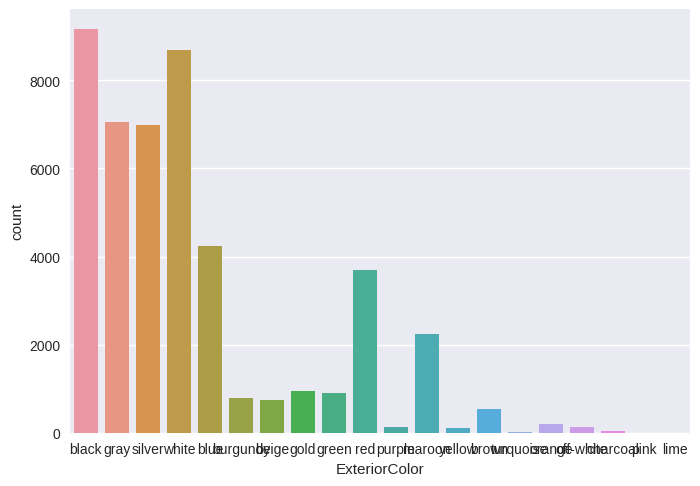

In [76]:
# Basic, minimal plot example
sns.countplot(x='ExteriorColor', data=df)

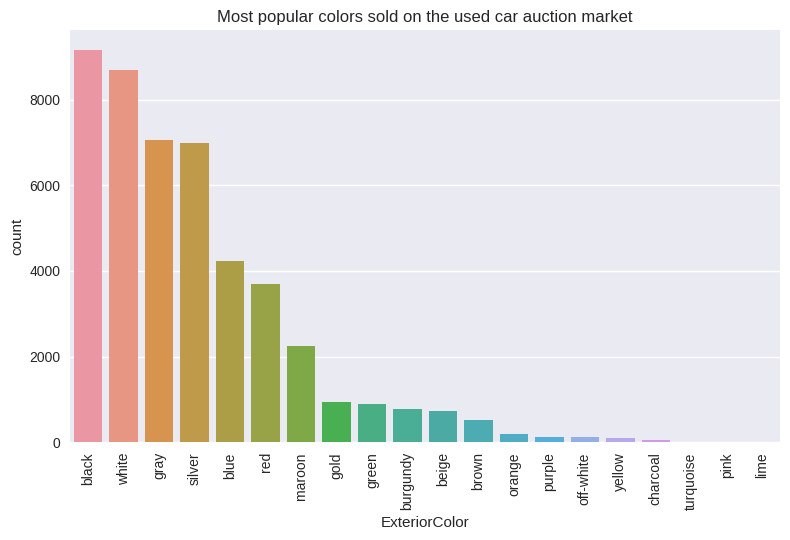

In [77]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('ExteriorColor').size().sort_values(ascending=False)
sns.countplot(x='ExteriorColor', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

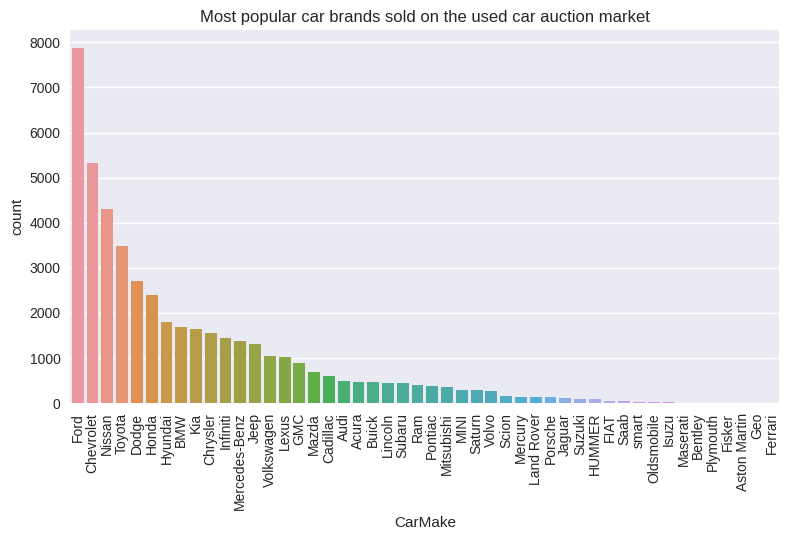

In [92]:
large_to_small = df.groupby('CarMake').size().sort_values(ascending=False)
sns.countplot(x='CarMake', data=df, order=large_to_small.index).set(title='Most popular car brands sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Answer for Q1**: Ford is the most popular car brand of used cars sold in auctions, followed by Chevrolet, then Nissan.

**Q2: Draw a bar plot showing the selling price of each of the transmission categories. Do automatic cars, on
average (mean), sell for a higher price than manual cars?**

(Use the following link for reference:
https://seaborn.pydata.org/generated/seaborn.barplot.html)


**Visualization**

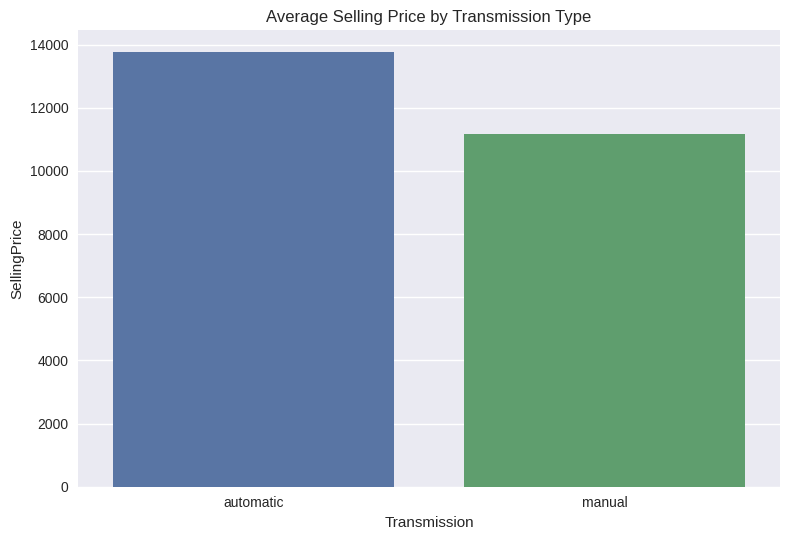

In [83]:
mean_prices = df.groupby('Transmission')['SellingPrice'].mean().reset_index()

sns.barplot(x='Transmission', y='SellingPrice', data=mean_prices).set(title='Average Selling Price by Transmission Type')
plt.tight_layout()
plt.show()

**Answer for Q2**: The average selling price of automatic used cars is higher than those who are manual

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

Car makes with the widest distribution of selling prices:
CarMake
Bentley    33522.827377
Porsche    26717.778089
Name: SellingPrice, dtype: float64


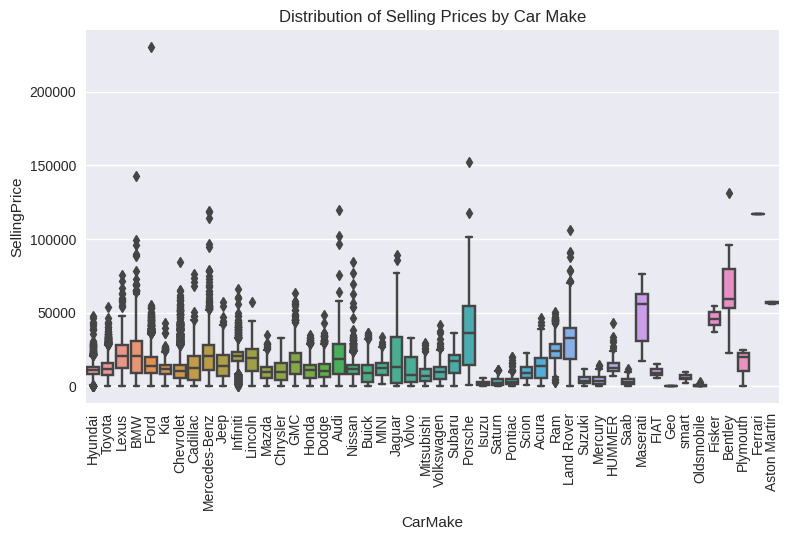

In [38]:
sns.boxplot(x='CarMake', y='SellingPrice', data=df).set(title='Distribution of Selling Prices by Car Make')
plt.xticks(rotation=90)
plt.tight_layout()

widest_distributions = df.groupby('CarMake')['SellingPrice'].std().sort_values(ascending=False).head(2)
print("Car makes with the widest distribution of selling prices:")
print(widest_distributions)

plt.show()

**Answer for Q3**: The car brands that has the widest selling price distribution are Bentley, followed by Porsche. And the most expensive is Ford then Porsche.

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

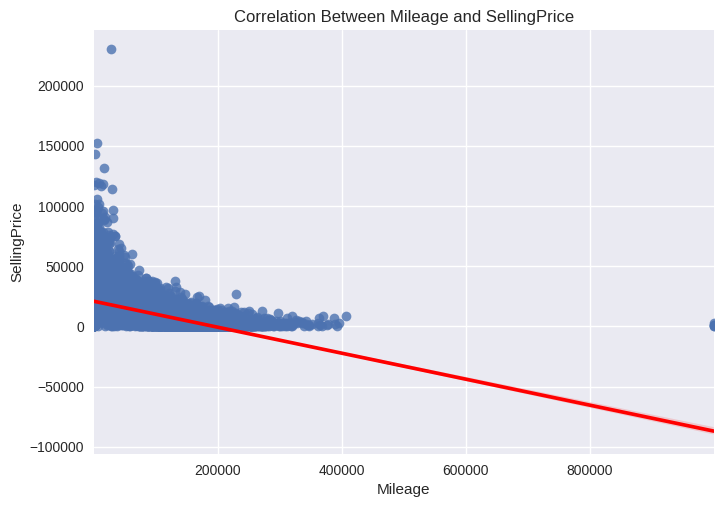

In [78]:
sns.regplot(x='Mileage', y='SellingPrice', data=df, line_kws={'color':'red'}).set(title='Correlation Between Mileage and SellingPrice')
plt.xlim(df['Mileage'].min(), df['Mileage'].max())
plt.show()

**Answer for Q4**: The relationship between the car mileage and the selling price is negative, where the higher the mileage the lower the price.

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

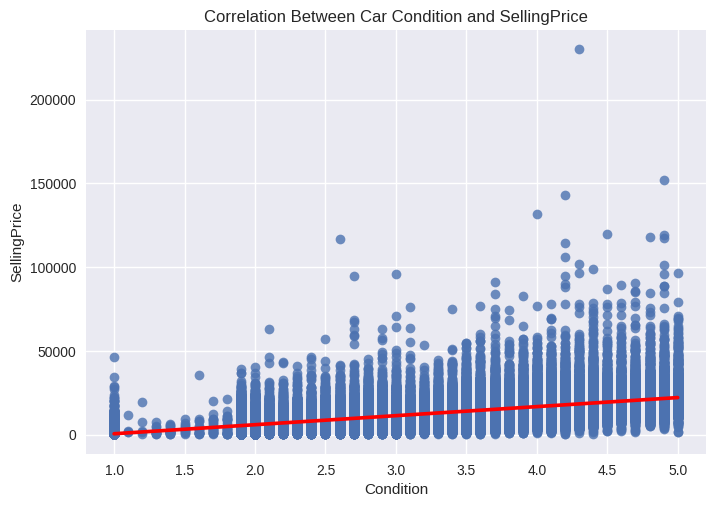

In [81]:
sns.regplot(x='Condition', y='SellingPrice', data=df, line_kws={'color':'red'}).set(title='Correlation Between Car Condition and SellingPrice')
plt.show()

**Answer for Q5**: The relationship between the car condition and the selling price is slightly positive, where the higher the condition the higher the price.

**Q6: Draw a bar plot showing the selling price of each of the body categories. Are there differences in the average
(mean of) car price due to the car’s body type? If so, rank their order and state the most expensive and least
expensive car body type.**

**Visualization**

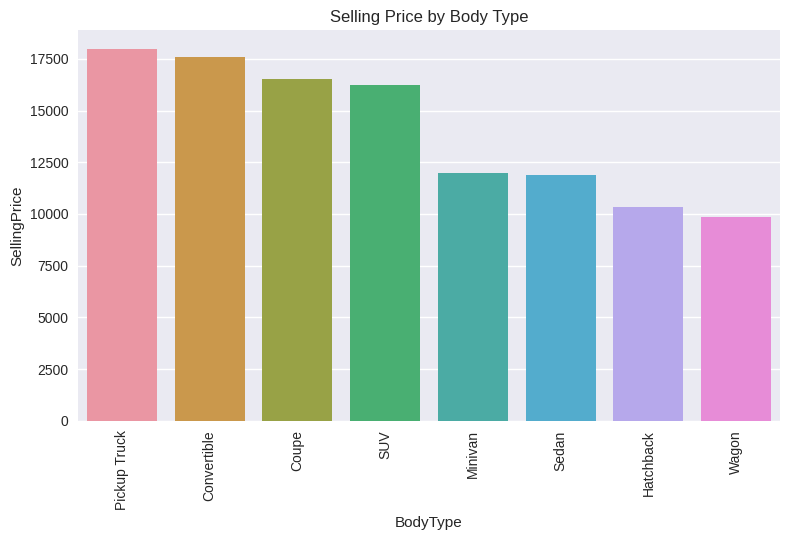

In [71]:
mean_prices = df.groupby('BodyType')['SellingPrice'].mean().reset_index().sort_values(by='SellingPrice', ascending=False)

sns.barplot(x='BodyType', y='SellingPrice', data=mean_prices).set(title='Selling Price by Body Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Answer for Q6**: Yes, the order is shown in the bar plot. And The most expensive body type is 'Pickup Truck', however the least expensive is 'Wagon'.

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [53]:
df.isnull().sum()

CarYear          0
CarMake          0
CarModel         0
Trim             0
BodyType         0
Transmission     0
US_State         0
CarCondition     0
Mileage          0
ExteriorColor    0
InteriorColor    0
Seller           0
MarketPrice      0
SellingPrice     0
SaleDate         0
TimeZone         0
dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CarYear        46578 non-null  int64         
 1   CarMake        46578 non-null  object        
 2   CarModel       46578 non-null  object        
 3   Trim           46578 non-null  object        
 4   BodyType       46578 non-null  object        
 5   Transmission   46578 non-null  object        
 6   US_State       46578 non-null  object        
 7   CarCondition   46578 non-null  float64       
 8   Mileage        46578 non-null  float64       
 9   ExteriorColor  46578 non-null  object        
 10  InteriorColor  46578 non-null  object        
 11  Seller         46578 non-null  object        
 12  MarketPrice    46578 non-null  float64       
 13  SellingPrice   46578 non-null  float64       
 14  SaleDate       46578 non-null  datetime64[ns]
 15  TimeZone       4657

In [67]:
df.describe(include='all')

<ipython-input-67-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,CarYear,CarMake,CarModel,Trim,BodyType,Transmission,US_State,CarCondition,Mileage,ExteriorColor,InteriorColor,Seller,MarketPrice,SellingPrice,SaleDate,TimeZone
count,46578.000000,46578,46578,46578,46578,46578,46578,46578.000000,46578.000000,46578,46578,46578,46578.000000,46578.000000,46578,46578
unique,NaN,48,648,1097,8,2,34,NaN,NaN,20,17,4686,NaN,NaN,2286,2
top,NaN,Ford,Altima,Base,Sedan,automatic,fl,NaN,NaN,black,black,"ford motor credit company,llc",NaN,NaN,2015-02-10 01:30:00,-0800 (PST)
freq,NaN,7871,1610,4851,21574,44928,7451,NaN,NaN,9156,20734,1733,NaN,NaN,490,32918
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-01 09:15:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-09 17:15:00,NaN
mean,2010.203401,NaN,NaN,NaN,NaN,NaN,NaN,3.424265,66850.642621,NaN,NaN,NaN,13810.580102,13669.705204,NaN,NaN
std,3.831316,NaN,NaN,NaN,NaN,NaN,NaN,0.944009,51868.395670,NaN,NaN,NaN,9510.332473,9632.257208,NaN,NaN
min,1990.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,25.000000,150.000000,NaN,NaN
25%,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,28185.000000,NaN,NaN,NaN,7400.000000,7100.000000,NaN,NaN


In [68]:
df.head()

,CarYear,CarMake,CarModel,Trim,BodyType,Transmission,US_State,CarCondition,Mileage,ExteriorColor,InteriorColor,Seller,MarketPrice,SellingPrice,SaleDate,TimeZone
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,ma,3.9,50404.0,black,gray,the hertz corporation,11000.0,10900.0,2015-06-02 02:30:00,-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,fl,4.9,17846.0,gray,maroon,award auto sales and leasing inc,28700.0,29900.0,2015-02-18 07:15:00,-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,fl,4.1,21122.0,silver,black,lexus financial services,22200.0,24200.0,2015-01-20 01:30:00,-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,fl,1.9,145303.0,black,black,peddle llc,3675.0,3200.0,2015-03-04 07:10:00,-0800 (PST)
4,2014,Ford,E-Series Van,E-250,Minivan,automatic,wa,4.9,6714.0,white,gray,u-haul,22500.0,22100.0,2015-02-18 06:45:00,-0800 (PST)


In [34]:
df.BodyType.unique()

array(['Sedan', 'SUV', 'Minivan', 'Pickup Truck', 'Wagon', 'Coupe',
       'Convertible', 'Hatchback'], dtype=object)

In [55]:
df.ExteriorColor.unique()

array(['black', 'gray', 'silver', 'white', 'blue', 'burgundy', 'beige',
       'gold', 'green', 'red', 'purple', 'maroon', 'yellow', 'brown',
       'turquoise', 'orange', 'off-white', 'charcoal', 'pink', 'lime'],
      dtype=object)

In [56]:
df.InteriorColor.unique()

array(['gray', 'maroon', 'black', 'beige', 'tan', 'red', 'blue', 'brown',
       'off-white', 'silver', 'orange', 'purple', 'white', 'gold',
       'burgundy', 'green', 'yellow'], dtype=object)

In [72]:
df.corr()

<ipython-input-72-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CarYear,CarCondition,Mileage,MarketPrice,SellingPrice
CarYear,1.000000,0.549158,-0.777219,0.592904,0.581164
CarCondition,0.549158,1.000000,-0.540371,0.476200,0.529141
Mileage,-0.777219,-0.540371,1.000000,-0.587920,-0.580900
MarketPrice,0.592904,0.476200,-0.587920,1.000000,0.979783
SellingPrice,0.581164,0.529141,-0.580900,0.979783,1.000000


In [15]:
categorical_columns = ['CarMake', 'CarModel', 'Trim', 'BodyType', 'US_State','Transmission', 'ExteriorColor', 'InteriorColor', 'Seller', 'SaleDate', 'TimeZone']
df_encode = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# difference in data before/after encoding
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)
df_encode.head()

Columns in original data frame:
 ['CarYear' 'CarMake' 'CarModel' 'Trim' 'BodyType' 'Transmission'
 'US_State' 'CarCondition' 'Mileage' 'ExteriorColor' 'InteriorColor'
 'Seller' 'MarketPrice' 'SellingPrice' 'SaleDate' 'TimeZone']

Number of rows and columns in the dataset: (46578, 16)

Columns in data frame after encoding:
 ['CarYear' 'CarCondition' 'Mileage' ... 'SaleDate_2015-07-09 13:30:00'
 'SaleDate_2015-07-09 17:15:00' 'TimeZone_-0800 (PST)']

Number of rows and columns in the dataset: (46578, 8842)


,CarYear,CarCondition,Mileage,MarketPrice,SellingPrice,CarMake_Aston Martin,CarMake_Audi,CarMake_BMW,CarMake_Bentley,CarMake_Buick,...,SaleDate_2015-07-08 10:30:00,SaleDate_2015-07-08 17:15:00,SaleDate_2015-07-09 06:30:00,SaleDate_2015-07-09 06:45:00,SaleDate_2015-07-09 07:00:00,SaleDate_2015-07-09 07:30:00,SaleDate_2015-07-09 09:00:00,SaleDate_2015-07-09 13:30:00,SaleDate_2015-07-09 17:15:00,TimeZone_-0800 (PST)
0,2013,3.9,50404.0,11000.0,10900.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,4.9,17846.0,28700.0,29900.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2012,4.1,21122.0,22200.0,24200.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2002,1.9,145303.0,3675.0,3200.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2014,4.9,6714.0,22500.0,22100.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
# numerical columns for normalization
numerical_columns = ['CarYear', 'CarCondition', 'Mileage', 'MarketPrice']


# Perform min-max normalization
df_encode[numerical_columns] = (df_encode[numerical_columns] - df_encode[numerical_columns].min()) / (df_encode[numerical_columns].max() - df_encode[numerical_columns].min())

# Print the normalized DataFrame
print(df_encode.head())

   CarYear  CarCondition   Mileage  MarketPrice  SellingPrice  \
0     0.92         0.725  0.050403     0.075184       10900.0   
1     0.96         0.975  0.017845     0.196438       29900.0   
2     0.88         0.775  0.021121     0.151910       24200.0   
3     0.48         0.225  0.145302     0.025004        3200.0   
4     0.96         0.975  0.006713     0.153965       22100.0   

   CarMake_Aston Martin  CarMake_Audi  CarMake_BMW  CarMake_Bentley  \
0                     0             0            0                0   
1                     0             0            0                0   
2                     0             0            0                0   
3                     0             0            1                0   
4                     0             0            0                0   

   CarMake_Buick  ...  SaleDate_2015-07-08 10:30:00  \
0              0  ...                             0   
1              0  ...                             0   
2              0 

## Modelling

_Apply the linear regression model below._

In [17]:
from sklearn.model_selection import train_test_split

x = df_encode.drop('MarketPrice',axis=1) # Independent variable
y = df_encode['SellingPrice'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 37262
Testing dataset size: 9316


In [18]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);

In [19]:
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

,parameter,column,theta_value
0,theta_0,y-intersect,5.343601e-05
1,theta_1,CarYear,-9.146133e-12
2,theta_2,CarCondition,4.245493e-12
3,theta_3,Mileage,1.023957e-10
4,theta_4,SellingPrice,1.000000e+00
...,...,...,...
8837,theta_8837,SaleDate_2015-07-09 07:30:00,-6.305570e-07
8838,theta_8838,SaleDate_2015-07-09 09:00:00,-6.305575e-07
8839,theta_8839,SaleDate_2015-07-09 13:30:00,-4.808472e-07
8840,theta_8840,SaleDate_2015-07-09 17:15:00,2.063450e-06


## Model Evaluation

_Evaluate the model you applied._

In [20]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Evaluation
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)

# R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

The root mean square error (RMSE) is:  9.235735132945056e-06
R^2 obtained is: 1.0


## Conclusion and Recommendations

Comment on the model accuracy, and thoroughly explain its value, as well as your findings from the model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: your answer here.